# PREDICTION OF DEATHS DUE TO CANCER

# Objective:

To analyze the trends and patterns of cancer deaths and identify potential factors influencing these statistics. Our objective is to give a detail report on deaths caused by cancer in each country and death toll ratio according to the gender.



- What we are working on:

We are conducting a research project to investigate the current situation of cancer-related deaths in R. This involves collecting and analyzing data on the number of cancer deaths, types of cancer, demographics of the affected population, and possible risk factors.



- What we are planning to find:

Through our analysis, we aim to identify any significant changes in the cancer death rates over time, variations among different regions or communities in R, and potential associations between cancer deaths and lifestyle, socioeconomic status, or healthcare access. We also intend to explore any possible disparities in cancer mortality rates among different racial or ethnic groups within the population.

-Stakeholders:

The stakeholders for this project include:

1. Government health agencies and policymakers who can utilize the findings to develop targeted interventions and policies to reduce the burden of cancer deaths.

2. Healthcare professionals and researchers who can benefit from a deeper understanding of the current cancer death trends to inform their clinical practices and research studies.

3. Advocacy groups and nonprofits working on cancer prevention, treatment, and support who can use the findings to raise awareness and allocate resources effectively.

4. General public who can gain knowledge about the prevalence.

# Import & Load Data

In [ ]:
install.packages("googledrive")
suppressPackageStartupMessages(library(googledrive))

install.packages("tidyverse")
suppressPackageStartupMessages(library(tidyverse))

install.packages("readxl")
suppressPackageStartupMessages(library(readxl))

install.packages("janitor")
suppressPackageStartupMessages(library(janitor))

install.packages("ggcorrplot")
suppressPackageStartupMessages(library(ggcorrplot))

In [3]:
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: Yes


Enter a number between 1 and 2, or enter 0 to exit.


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=4e3f5b0ff3d79e1d48c1e89b69da3a6f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbXYyRm9maVFZTmljbUxXTWMwMHgwckR3YWtKbGlHMmVDdHZoYUIwLWVuSjl5YzBvR0ZzZEhObWpOVWRZanpnQSIsInN0YXRlIjoiNGUzZjViMGZmM2Q3OWUxZDQ4YzFlODliNjlkYTNhNmYifQ==


In [4]:
suppressMessages(file1 <- drive_download("01_annual_number_of_deaths_by_cause.csv", overwrite = T))
suppressMessages(file2 <- drive_download("GHED_data.XLSX", overwrite = T))
suppressMessages(file3 <- drive_download("gdp.csv", overwrite = T))
suppressMessages(file3 <- drive_download("population.csv", overwrite = T))

Load the Datasets

In [5]:
Annual_deaths <- read.csv("01_annual_number_of_deaths_by_cause.csv")
Health_Expenditure <- read_excel("GHED_data.XLSX")
GDP <- read.csv("gdp.csv")
Population <- read.csv("population.csv")

In [6]:
head(Annual_deaths)

,Entity,Code,Year,Number.of.executions..Amnesty.International.,Deaths...Meningitis...Sex..Both...Age..All.Ages..Number.,Deaths...Alzheimer.s.disease.and.other.dementias...Sex..Both...Age..All.Ages..Number.,Deaths...Parkinson.s.disease...Sex..Both...Age..All.Ages..Number.,Deaths...Nutritional.deficiencies...Sex..Both...Age..All.Ages..Number.,Deaths...Malaria...Sex..Both...Age..All.Ages..Number.,Deaths...Drowning...Sex..Both...Age..All.Ages..Number.,⋯,Deaths...Chronic.kidney.disease...Sex..Both...Age..All.Ages..Number.,Deaths...Poisonings...Sex..Both...Age..All.Ages..Number.,Deaths...Protein.energy.malnutrition...Sex..Both...Age..All.Ages..Number.,Terrorism..deaths.,Deaths...Road.injuries...Sex..Both...Age..All.Ages..Number.,Deaths...Chronic.respiratory.diseases...Sex..Both...Age..All.Ages..Number.,Deaths...Cirrhosis.and.other.chronic.liver.diseases...Sex..Both...Age..All.Ages..Number.,Deaths...Digestive.diseases...Sex..Both...Age..All.Ages..Number.,Deaths...Fire..heat..and.hot.substances...Sex..Both...Age..All.Ages..Number.,Deaths...Acute.hepatitis...Sex..Both...Age..All.Ages..Number.
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AFG,2007,15,2933,1402,450,2488,393,2127,⋯,4490,512,2439,1199,7425,7222,3346,6458,481,3437
2,Afghanistan,AFG,2008,17,2731,1424,455,2277,255,1973,⋯,4534,495,2231,1092,7355,7143,3316,6408,462,3005
3,Afghanistan,AFG,2009,0,2460,1449,460,2040,239,1852,⋯,4597,483,1998,1065,7290,7045,3291,6358,448,2663
4,Afghanistan,AFG,2011,2,2327,1508,473,1846,390,1775,⋯,4785,483,1805,1525,7432,6916,3318,6370,448,2365
5,Afghanistan,AFG,2012,14,2254,1544,482,1705,94,1716,⋯,4846,482,1667,3521,7494,6878,3353,6398,445,2264
6,Afghanistan,AFG,2013,2,2281,1581,491,1690,143,1777,⋯,4945,494,1651,3709,8054,6859,3413,6476,460,2204


In [7]:
head(Health_Expenditure)

country,code,region,income,year,che_gdp,che_pc_usd,hk_gdp,hk_g_gdp,hk_ext_gdp,⋯,age1_gghed_ppp2020_pc,age1_ext_ppp2020_pc,age1_pvtd_ppp2020_pc,hk_ppp2020_pc,hk_gghed_ppp2020_pc,hk_ext_ppp2020_pc,hk_pvtd_ppp2020_pc,gdp_ppp2020_pc,pfc_ppp2020_pc,gge_ppp2020_pc
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,DZA,AFR,Lower-middle,2000,3.489033,62.11769,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,9422.671,3917.144,2692.144
Algeria,DZA,AFR,Lower-middle,2001,3.837877,67.33850,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,9572.762,4184.333,2991.622
Algeria,DZA,AFR,Lower-middle,2002,3.730042,66.94760,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,9973.432,4386.696,3419.400
Algeria,DZA,AFR,Lower-middle,2003,3.601041,76.23547,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,10547.676,4270.039,3396.579
Algeria,DZA,AFR,Lower-middle,2004,3.544073,93.02433,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,10847.518,4182.639,3337.236
Algeria,DZA,AFR,Lower-middle,2005,3.235161,101.30373,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,11331.868,3825.742,3071.838


In [8]:
head(GDP)

,Country.Name,Country.Code,Year,Value
,<chr>,<chr>,<int>,<dbl>
1,Arab World,ARB,1968,25760683041
2,Arab World,ARB,1969,28434203615
3,Arab World,ARB,1970,31385499664
4,Arab World,ARB,1971,36426909888
5,Arab World,ARB,1972,43316056615
6,Arab World,ARB,1973,55018394946


In [9]:
head(Population)

,Country.Name,Country.Code,Year,Value
,<chr>,<chr>,<int>,<dbl>
1,Arab World,ARB,1960,92197753
2,Arab World,ARB,1961,94724510
3,Arab World,ARB,1962,97334442
4,Arab World,ARB,1963,100034179
5,Arab World,ARB,1964,102832760
6,Arab World,ARB,1965,105736431


In [10]:
cat("Number of Rows in the Annual_deaths:", nrow(Annual_deaths), "\n")
cat("Number of Columns in the Annual_deaths:", ncol(Annual_deaths), "\n")


cat("Number of Rows in the Health_Expenditure:", nrow(Health_Expenditure), "\n")
cat("Number of Columns in the Health_Expenditure:", ncol(Health_Expenditure), "\n")

cat("Number of Rows in the GDP:", nrow(GDP), "\n")
cat("Number of Columns in the GDP:", ncol(GDP), "\n")

cat("Number of Rows in the Population:", nrow(Population), "\n")
cat("Number of Columns in the Population:", ncol(Population), "\n")

Number of Rows in the Annual_deaths: 6893 
Number of Columns in the Annual_deaths: 36 
Number of Rows in the Health_Expenditure: 4224 
Number of Columns in the Health_Expenditure: 3220 
Number of Rows in the GDP: 11507 
Number of Columns in the GDP: 4 
Number of Rows in the Population: 15409 
Number of Columns in the Population: 4 


**We are going clean and rearrange the 4 Datasets into single dataset and apply data exploration**





# Data Cleaning

In [11]:
#Replaces the spaces with '_'
Annual_deaths <- clean_names(Annual_deaths)
#Remove the unwanted part
names(Annual_deaths) <- gsub("deaths_", "", names(Annual_deaths))
names(Annual_deaths) <- gsub("_sex_both_age_all_ages_number", "", names(Annual_deaths))
names(Annual_deaths) <- gsub("_s", "s", names(Annual_deaths))

#Rename the column names
col1 <- c('entity','code','year','neoplasms')
Deaths = Annual_deaths[col1]
colnames(Deaths)[1] = "Country"
colnames(Deaths)[2] = "Country_Code"
colnames(Deaths)[3] = "Year"
colnames(Deaths)[4] = "Deaths"

#Rename the column names
col2 <- c('country','code','year','che_gdp')
Health_Exp  <- Health_Expenditure[col2]
colnames(Health_Exp)[1] = "Country"
colnames(Health_Exp)[2] = "Country_Code"
colnames(Health_Exp)[3] = "Year"
colnames(Health_Exp)[4] = "Health_Expenditure"

#Rename the column names
colnames(Population)[1] = "Country"
colnames(Population)[2] = "Country_Code"
colnames(Population)[4] = "Population"

#Rename the column names
colnames(GDP)[1] = "Country"
colnames(GDP)[2] = "Country_Code"
colnames(GDP)[3] = "Year"
colnames(GDP)[4] = "GDP"

Join the 4 datasets using inner join method (Only column scommon in both datasets are loaded)

In [12]:
d1 <-inner_join(Deaths,Health_Exp, by = c('Country','Country_Code','Year'))
d2 <- inner_join(d1,Population,by = c('Country','Country_Code','Year'))
Cancer_Deaths <- inner_join(d2,GDP,by = c('Country','Country_Code','Year'))

# <U> Data Exploration

In [13]:
head(Cancer_Deaths)

,Country,Country_Code,Year,Deaths,Health_Expenditure,Population,GDP
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,2007,15925,9.904675,27100536,9843842455
2,Afghanistan,AFG,2008,16148,10.256495,27722276,10190529882
3,Afghanistan,AFG,2009,16383,9.818487,28394813,12486943506
4,Afghanistan,AFG,2011,17094,8.561908,30117413,17930239400
5,Afghanistan,AFG,2012,17522,7.897169,31161376,20536542737
6,Afghanistan,AFG,2013,18015,8.805964,32269589,20046334304


We have data country wise and year wise.

1. Deaths: Number of Cancer Deaths in a Year of that Country
2. Health_Expenditure: Percnetage of GDP spent in Healthcare
3. GDP: GDP of the country in a year in dollars

In [14]:
cat("Number of Rows in the Cancer_Deaths:", nrow(Cancer_Deaths), "\n")
cat("Number of Columns in the Cancer_Deaths:", ncol(Cancer_Deaths), "\n")

Number of Rows in the Cancer_Deaths: 2647 
Number of Columns in the Cancer_Deaths: 7 


In [15]:
str(Cancer_Deaths)

'data.frame':	2647 obs. of  7 variables:
 $ Country           : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Country_Code      : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ Year              : num  2007 2008 2009 2011 2012 ...
 $ Deaths            : int  15925 16148 16383 17094 17522 18015 18462 18876 19459 14312 ...
 $ Health_Expenditure: num  9.9 10.26 9.82 8.56 7.9 ...
 $ Population        : num  27100536 27722276 28394813 30117413 31161376 ...
 $ GDP               : num  9.84e+09 1.02e+10 1.25e+10 1.79e+10 2.05e+10 ...


1.   Our Dataset have 2 Charcter type columns
1.   Our Dataset have 4 Numeric type columns
2.   Our Dataset have 1 Interger type columns

In [16]:
summary(Cancer_Deaths)

   Country          Country_Code            Year          Deaths       
 Length:2647        Length:2647        Min.   :2000   Min.   :      7  
 Class :character   Class :character   1st Qu.:2004   1st Qu.:   1398  
 Mode  :character   Mode  :character   Median :2008   Median :   6829  
                                       Mean   :2008   Mean   :  41679  
                                       3rd Qu.:2012   3rd Qu.:  20102  
                                       Max.   :2016   Max.   :2477718  
                                                                       
 Health_Expenditure   Population             GDP           
 Min.   : 1.264     Min.   :9.394e+03   Min.   :1.320e+07  
 1st Qu.: 4.033     1st Qu.:1.987e+06   1st Qu.:4.405e+09  
 Median : 5.703     Median :7.309e+06   Median :1.936e+10  
 Mean   : 6.128     Mean   :3.599e+07   Mean   :2.428e+11  
 3rd Qu.: 7.961     3rd Qu.:2.126e+07   3rd Qu.:1.253e+11  
 Max.   :24.231     Max.   :1.379e+09   Max.   :1.120e+13  
 NA'

We have 30 NA's in Column Health_Expenditure

In [17]:
#Replace the NA's with Mean of Column
Cancer_Deaths$Health_Expenditure[is.na(Cancer_Deaths$Health_Expenditure)] <- mean(Cancer_Deaths$Health_Expenditure,na.rm=T)

In [18]:
#Verify NA's
sapply(Cancer_Deaths, function(x) sum(is.na(x)))

Country       Country_Code               Year             Deaths 
                 0                  0                  0                  0 
Health_Expenditure         Population                GDP 
                 0                  0                  0

# Adaption

As the data we have is year wise, we are going to caluculate the Total Deaths(in Million) in each country in 19 years

In [19]:
Deaths_Country <- Cancer_Deaths %>% group_by(Country) %>% summarize(Total_deaths = sum(Deaths, na.rm = TRUE)/100000) %>%  arrange(desc(Total_deaths))
head(Deaths_Country,n=5)

Country,Total_deaths
<chr>,<dbl>
China,370.47149
India,107.72188
Japan,64.23476
Germany,43.85340
Brazil,34.71587


China has Highest cancer deaths followed by India.

We are going to calculate Total Deaths(in Million) in a year

In [20]:
Deaths_Per_Year <- Cancer_Deaths %>% group_by(Year) %>% summarize(Deaths_per_year = (sum(Deaths)/length(unique(Cancer_Deaths$Year))/100000)) %>%  arrange(desc(Deaths_per_year))
head(Deaths_Per_Year,n=5)

Year,Deaths_per_year
<dbl>,<dbl>
2016,4.414794
2015,4.333398
2014,4.227182
2013,4.153975
2012,4.083848


We have highest deaths in 2018 followed by 2017. We have an increase of 0.1 million affter every year.

We are going to calculate percentage of Total Deaths on Population of country in 19 years.

In [21]:
Country_Deaths_Per_Population <- Cancer_Deaths %>% group_by(Country) %>% summarize(Deaths_Population = (sum(Deaths)/sum(Population))*100) %>%  arrange(desc(Deaths_Population))
head(Country_Deaths_Per_Population,n=5)

Country,Deaths_Population
<chr>,<dbl>
Monaco,0.6041120
Serbia,0.3621938
Hungary,0.3526566
San Marino,0.3164533
Germany,0.3151823


Monacco as highest deaths due to cancer based on population

# Visualization

We are going to plot the Trend of Deaths due to cancer over a period of 2000 - 2018

In [22]:
Average_Deaths <- (sum(as.numeric(Cancer_Deaths$Deaths)) / sum(as.numeric(Cancer_Deaths$Population))) * 100000

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


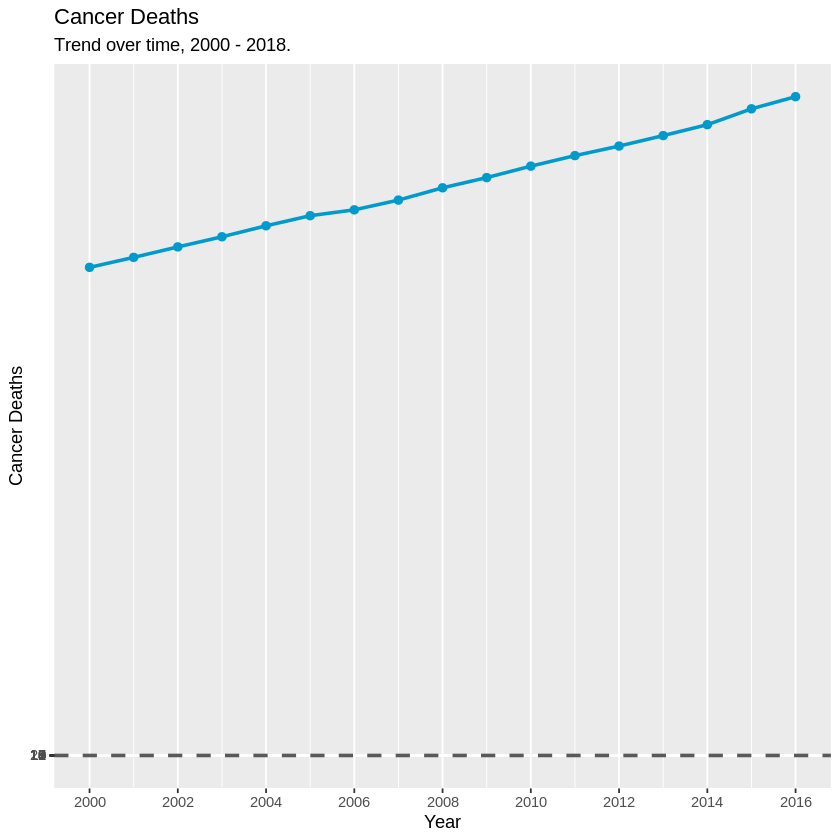

In [23]:
Cancer_Deaths %>%
  group_by(Year) %>%
  summarize(Cancer_death = sum(Deaths)) %>%
  ggplot(aes(x = Year, y = Cancer_death)) +
  geom_line(col = "deepskyblue3", size = 1) +
  geom_point(col = "deepskyblue3", size = 2) +
  geom_hline(yintercept = Average_Deaths, linetype = 2, color = "grey35", linewidth = 1) +
  labs(title = "Cancer Deaths",
       subtitle = "Trend over time, 2000 - 2018.",
       x = "Year",
       y = "Cancer Deaths") +
  scale_x_continuous(breaks = seq(2000, 2018, 2)) +
  scale_y_continuous(breaks = seq(10, 20))

Plot the country which has highest deaths in 19 years based on population

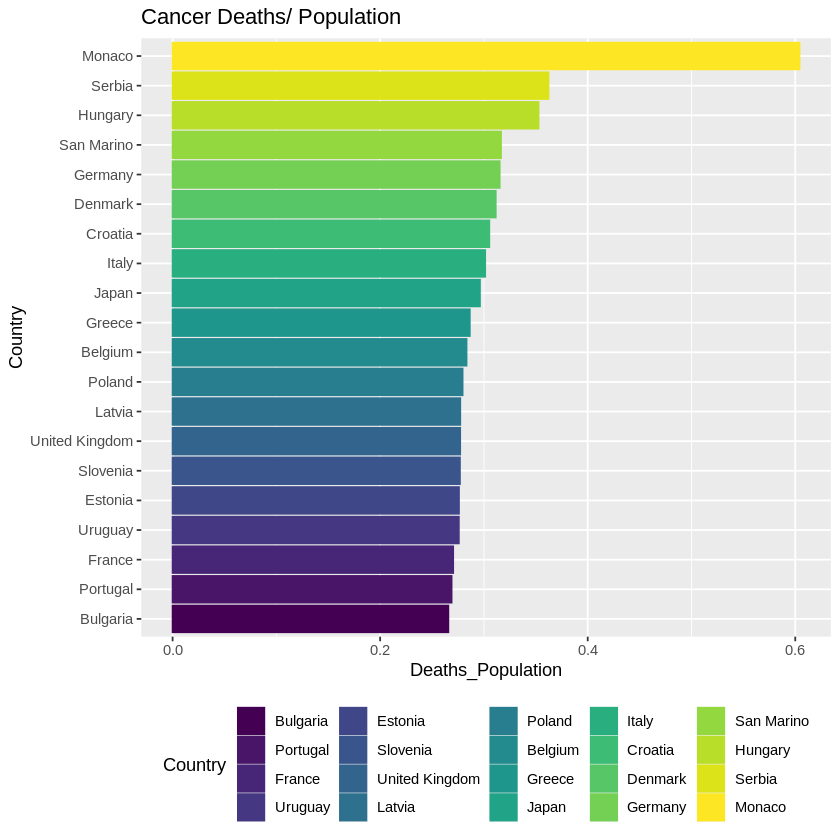

In [24]:
A <- Country_Deaths_Per_Population %>% slice(1:20)

 A$Country <- factor(A$Country,
                          ordered = T,
                          levels = rev(A$Country))

ggplot(A, aes(x = Country, y = Deaths_Population,color = Country, fill = Country)) +
  geom_bar(stat = "identity")+
  labs(title = "Cancer Deaths/ Population",
       x = "Country",
       y = "Deaths_Population") +
  coord_flip() +
  theme(legend.position = "bottom")

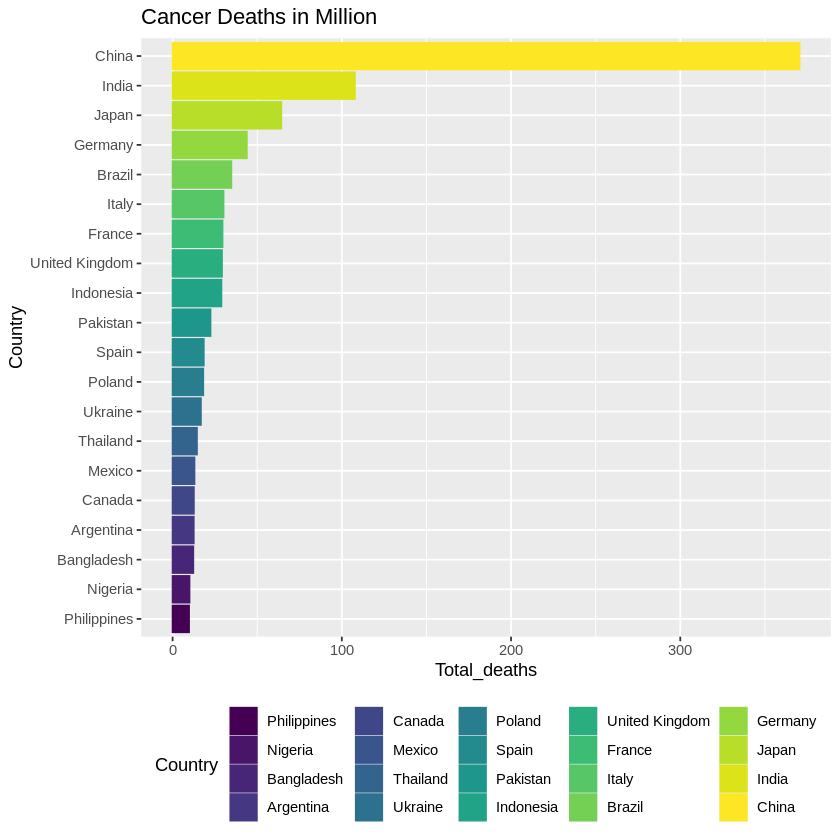

In [25]:
 Y <- Deaths_Country %>% slice(1:20)

 Y$Country <- factor(Y$Country,
                          ordered = T,
                          levels = rev(Y$Country))

ggplot(Y, aes(x = Country, y = Total_deaths,color = Country, fill = Country)) +
  geom_bar(stat = "identity")+
  labs(title = "Cancer Deaths in Million",
       x = "Country",
       y = "Total_deaths") +
  coord_flip() +
  theme(legend.position = "bottom")

Plot the spread of deaths over countries

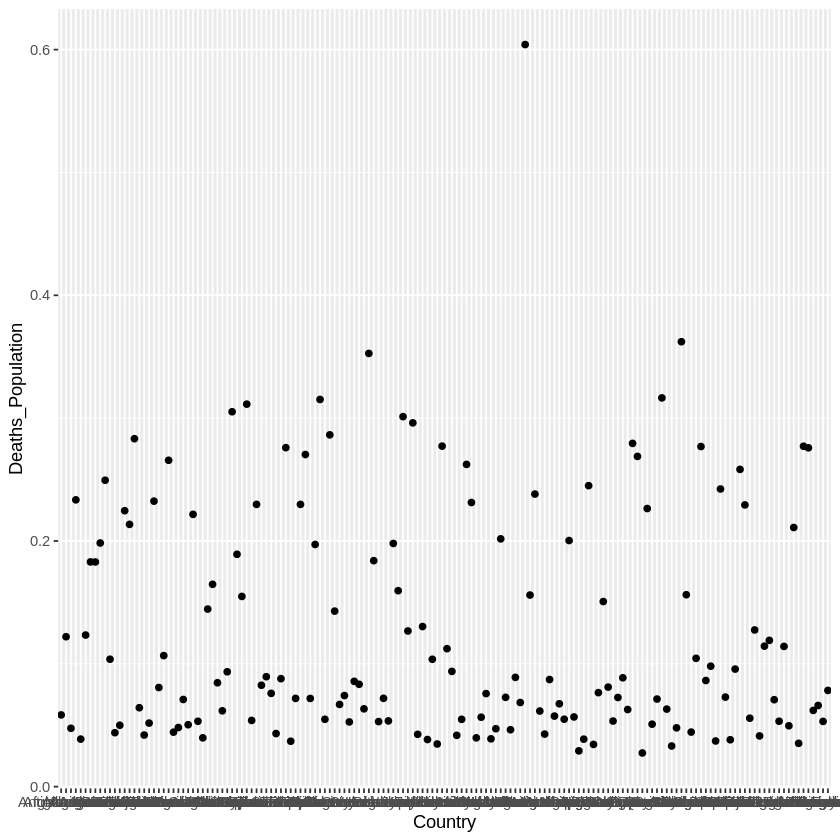

In [26]:
ggplot(data = Country_Deaths_Per_Population) +
      geom_point(mapping = aes(x = Country, y = Deaths_Population))

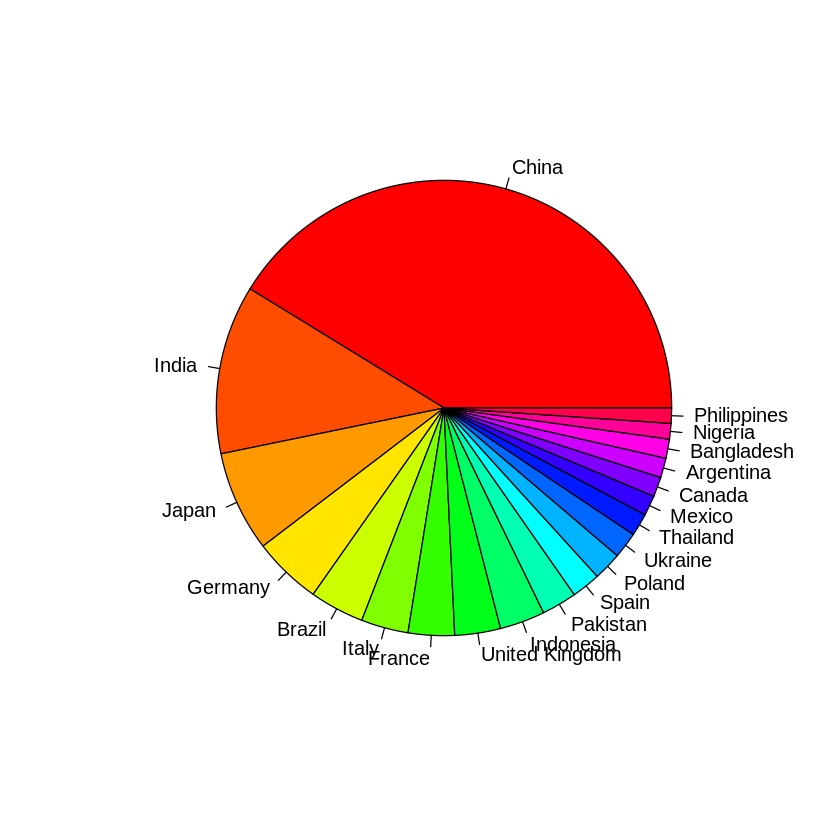

In [27]:
pie(Y$Total_deaths,labels = paste(Y$Country),
    col = rainbow(length(Y$Total_deaths)))

Undertsnad the spread of Deaths of Cancer

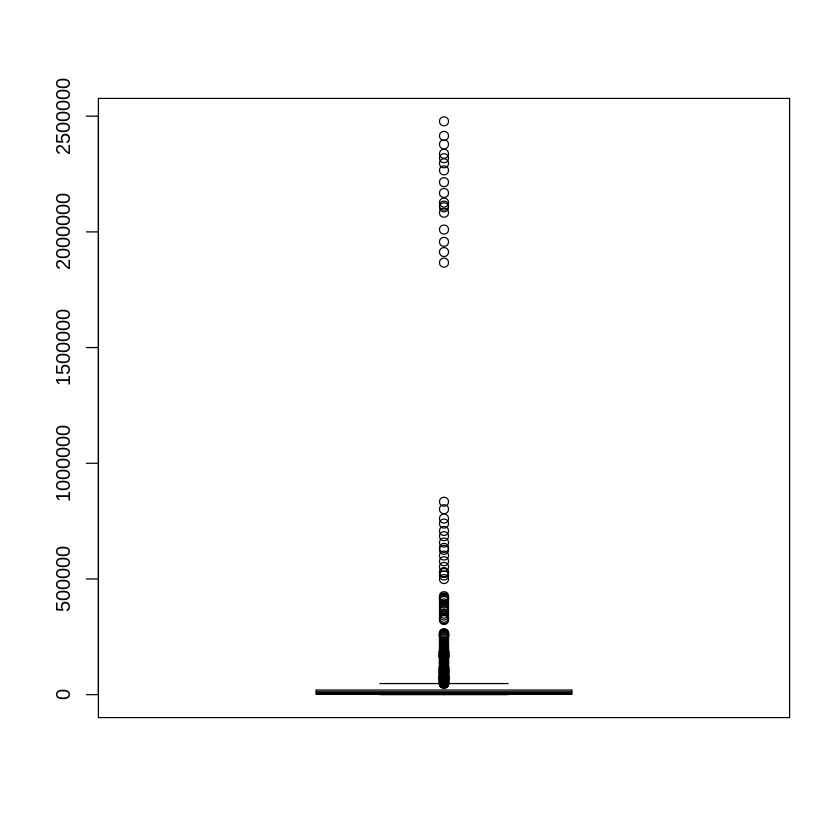

In [28]:
boxplot(Cancer_Deaths$Deaths)

We can understand large populated countries have large deaths compared to small countries

Create scatterplot on Population and Deaths

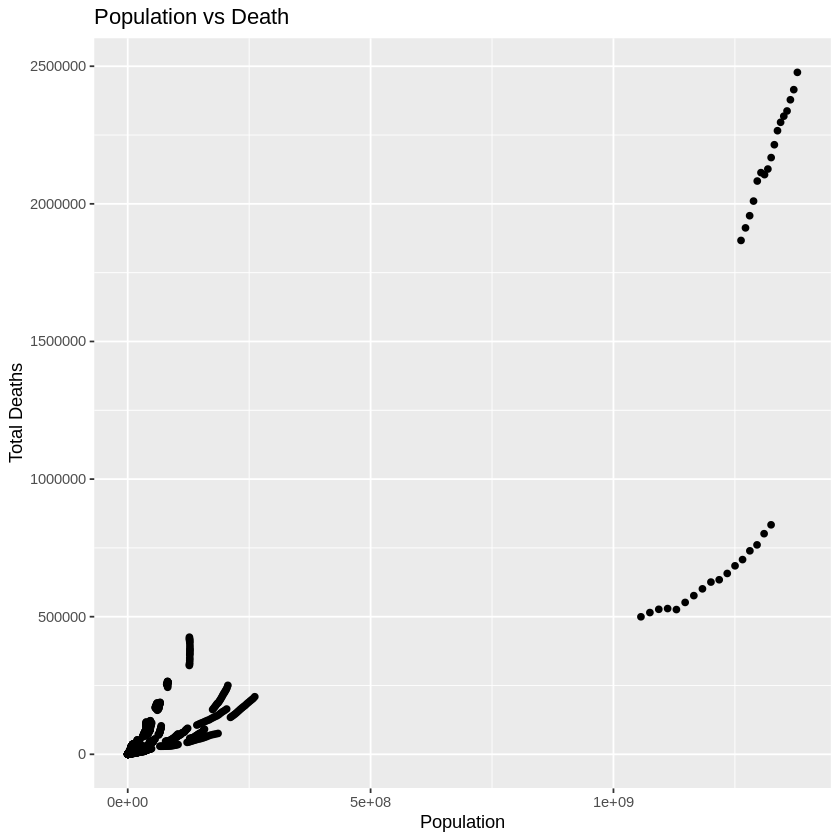

In [29]:
ggplot(Cancer_Deaths, aes(x = Population, y = Deaths)) +
  geom_point() +
  labs(title = "Population vs Death",
       x = "Population",
       y = "Total Deaths")

Deaths are increasing based on population

# Correlation

subset the dataframe whose columns are numeric to find correlation matrix

In [30]:
Cor_matrix <- Cancer_Deaths[, sapply(Cancer_Deaths,is.numeric)]

In [31]:
 Corr <- cor(Cor_matrix)
 Corr

,Year,Deaths,Health_Expenditure,Population,GDP
Year,1.00000000,0.02015291,0.12257523,0.01533992,0.09317853
Deaths,0.02015291,1.00000000,-0.02314793,0.88362058,0.72047947
Health_Expenditure,0.12257523,-0.02314793,1.00000000,-0.11283262,0.16890924
Population,0.01533992,0.88362058,-0.11283262,1.00000000,0.54329912
GDP,0.09317853,0.72047947,0.16890924,0.54329912,1.00000000


Theres is a positive correlation between Deaths and all remaining columns. Population has highest correlation followed by GDP. Correlation on Year and Health_Expenditure is very less.

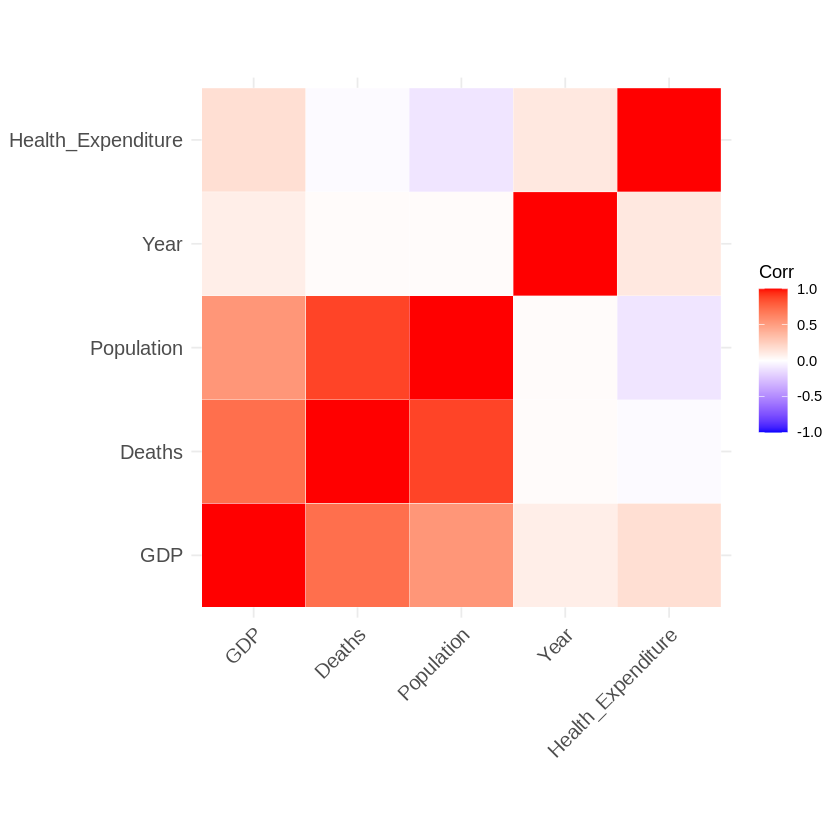

In [32]:
ggcorrplot(Corr, hc.order = TRUE, outline.color = "white")

# Response Variable

**As we can see from correlation matrix Death column has highest coefficient(0.88) on Population column, so Number of Deaths due to Cancer highly depend on Population.**

# Simple Linear Regression

We have 4 Varibales we are going to plot


Call:
lm(formula = Deaths ~ Population, data = Cancer_Deaths)

Residuals:
    Min      1Q  Median      3Q     Max 
-760742   -6973   -1132    2012  907490 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.107e+02  1.748e+03   0.406    0.684    
Population  1.138e-03  1.173e-05  97.061   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87290 on 2645 degrees of freedom
Multiple R-squared:  0.7808,	Adjusted R-squared:  0.7807 
F-statistic:  9421 on 1 and 2645 DF,  p-value: < 2.2e-16


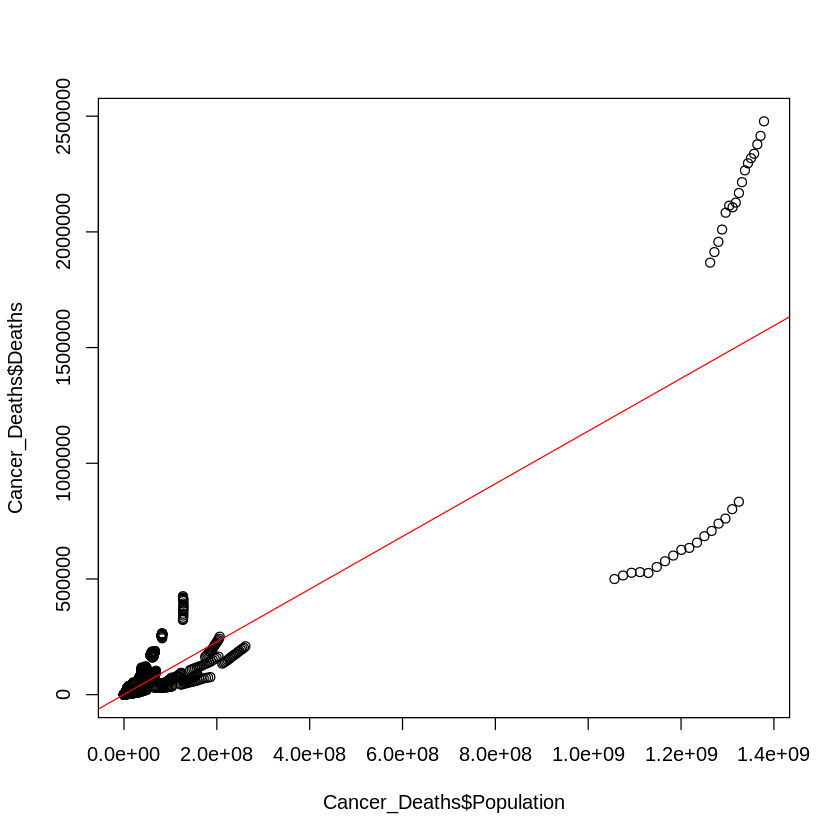

In [33]:
#Linear Regression using Population

Linear_1 <- lm(Deaths ~ Population, data = Cancer_Deaths)
summary(Linear_1)

plot(Cancer_Deaths$Population,Cancer_Deaths$Deaths)
abline(Linear_1, col ="red")


Call:
lm(formula = Deaths ~ GDP, data = Cancer_Deaths)

Residuals:
    Min      1Q  Median      3Q     Max 
-649273   -2036     352    5303 1748820 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.213e+02  2.630e+03   0.084    0.933    
GDP         1.707e-07  3.195e-09  53.432   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 129300 on 2645 degrees of freedom
Multiple R-squared:  0.5191,	Adjusted R-squared:  0.5189 
F-statistic:  2855 on 1 and 2645 DF,  p-value: < 2.2e-16


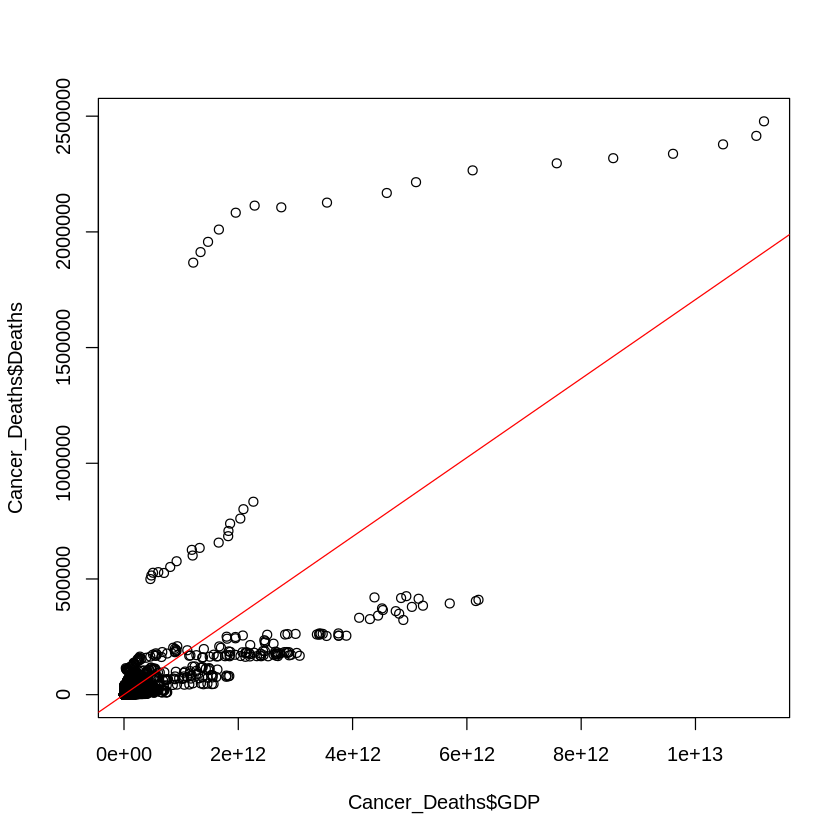

In [34]:
#Linear Regression using GDP
Linear_2 <- lm(Deaths ~ GDP, data = Cancer_Deaths)
summary(Linear_2)

plot(Cancer_Deaths$GDP,Cancer_Deaths$Deaths)
abline(Linear_2, col ="red")


Call:
lm(formula = Deaths ~ Year, data = Cancer_Deaths)

Residuals:
    Min      1Q  Median      3Q     Max 
 -47832  -39303  -34284  -21772 2429879 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1504200.8  1491208.3  -1.009    0.313
Year             769.9      742.6   1.037    0.300

Residual standard error: 186400 on 2645 degrees of freedom
Multiple R-squared:  0.0004061,	Adjusted R-squared:  2.822e-05 
F-statistic: 1.075 on 1 and 2645 DF,  p-value: 0.3


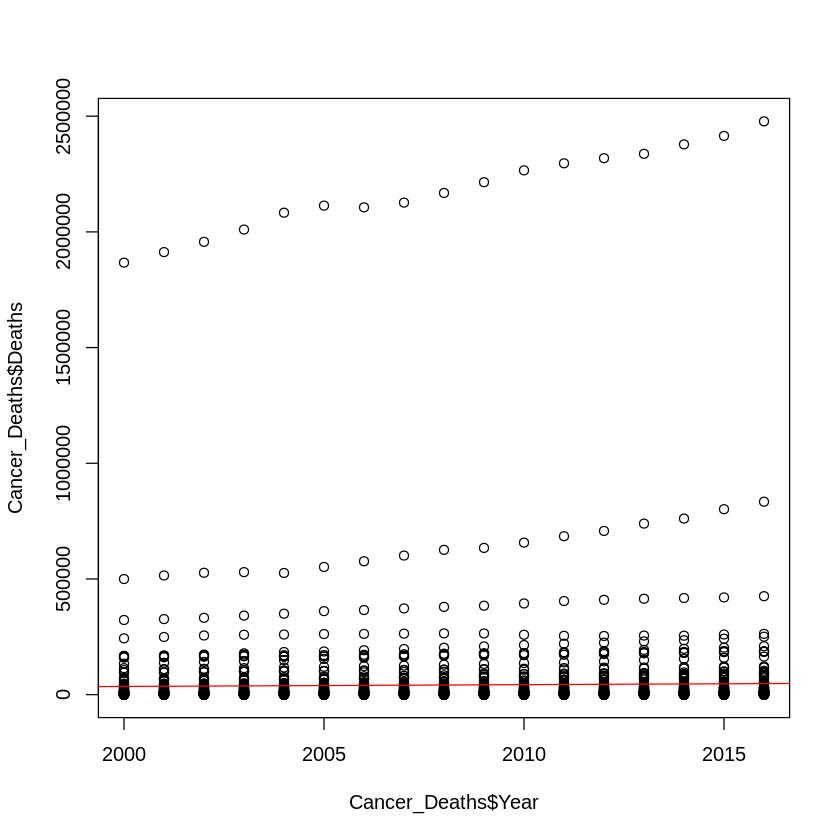

In [35]:
#Linear Regression using Year
Linear_3 <- lm(Deaths ~ Year, data = Cancer_Deaths)
summary(Linear_3)

plot(Cancer_Deaths$Year,Cancer_Deaths$Deaths)
abline(Linear_3, col ="red")


Call:
lm(formula = Deaths ~ Health_Expenditure, data = Cancer_Deaths)

Residuals:
    Min      1Q  Median      3Q     Max 
 -49073  -40226  -34269  -20367 2434186 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           51564       9057   5.693 1.38e-08 ***
Health_Expenditure    -1613       1354  -1.191    0.234    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 186400 on 2645 degrees of freedom
Multiple R-squared:  0.0005358,	Adjusted R-squared:  0.000158 
F-statistic: 1.418 on 1 and 2645 DF,  p-value: 0.2338


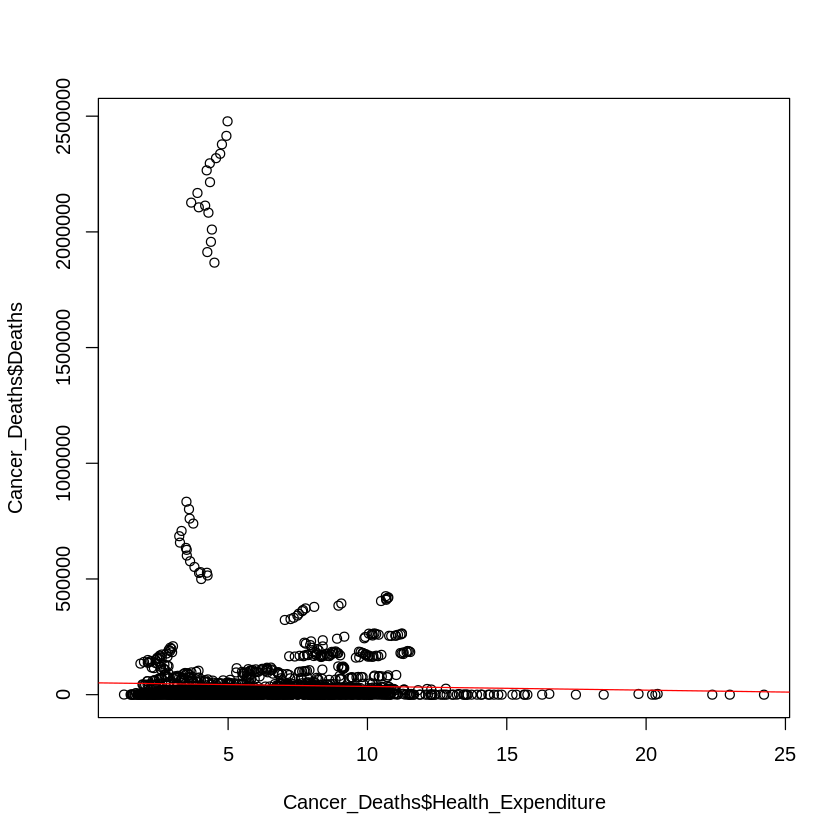

In [36]:
#Linear Regression using Health_Expenditure
Linear_4 <- lm(Deaths ~ Health_Expenditure, data = Cancer_Deaths)
summary(Linear_4)

plot(Cancer_Deaths$Health_Expenditure,Cancer_Deaths$Deaths)
abline(Linear_4, col ="red")

$R^2 = 0.7808$ for Population as variable

$R^2 = 0.5191$ for GDP as variable

$R^2 = 0.0005358$ for Year as variable

$R^2 = 0.0004061$ for Health_Expenditure as variable

**We have two variables Population, GDP on which Deaths are Highly dependent.**



# Multple Regression


Call:
lm(formula = Deaths ~ Population + GDP, data = Cancer_Deaths)

Residuals:
    Min      1Q  Median      3Q     Max 
-576990    -722    7643   10252  769100 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.032e+04  1.411e+03  -7.317 3.34e-13 ***
Population   8.997e-04  1.106e-05  81.380  < 2e-16 ***
GDP          8.082e-08  2.033e-09  39.750  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69070 on 2644 degrees of freedom
Multiple R-squared:  0.8628,	Adjusted R-squared:  0.8627 
F-statistic:  8313 on 2 and 2644 DF,  p-value: < 2.2e-16


Warning message in abline(Linear_2parameters, col = "red"):
“only using the first two of 3 regression coefficients”


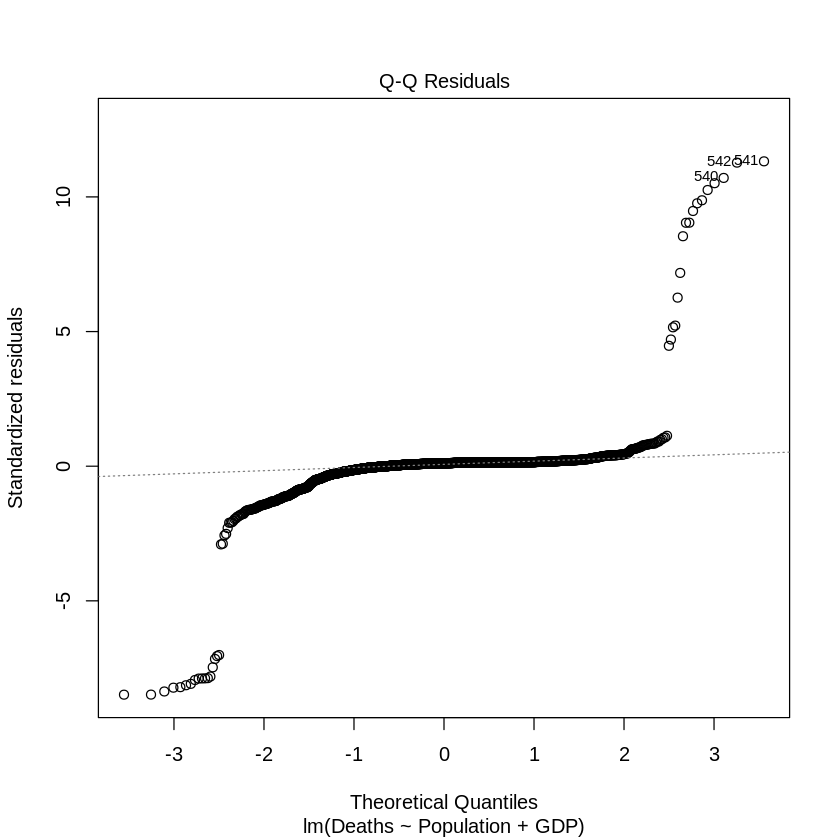

In [37]:
#Multi-Linear regresson using 2 variables Population and GDP
Linear_2parameters <- lm(Deaths ~ Population + GDP, data = Cancer_Deaths)
summary(Linear_2parameters)

plot(Linear_2parameters,which=2)
abline(Linear_2parameters, col ="red")


Call:
lm(formula = Deaths ~ Population + GDP + Health_Expenditure + 
    Year, data = Cancer_Deaths)

Residuals:
    Min      1Q  Median      3Q     Max 
-574375   -1035    6018   11357  766330 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.723e+06  5.572e+05   3.092  0.00201 ** 
Population          8.983e-04  1.139e-05  78.839  < 2e-16 ***
GDP                 8.145e-08  2.118e-09  38.465  < 2e-16 ***
Health_Expenditure  1.632e+01  5.276e+02   0.031  0.97533    
Year               -8.633e+02  2.777e+02  -3.109  0.00190 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68970 on 2642 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.8631 
F-statistic:  4171 on 4 and 2642 DF,  p-value: < 2.2e-16


Warning message in abline(Linear_4parameters, col = "blue"):
“only using the first two of 5 regression coefficients”


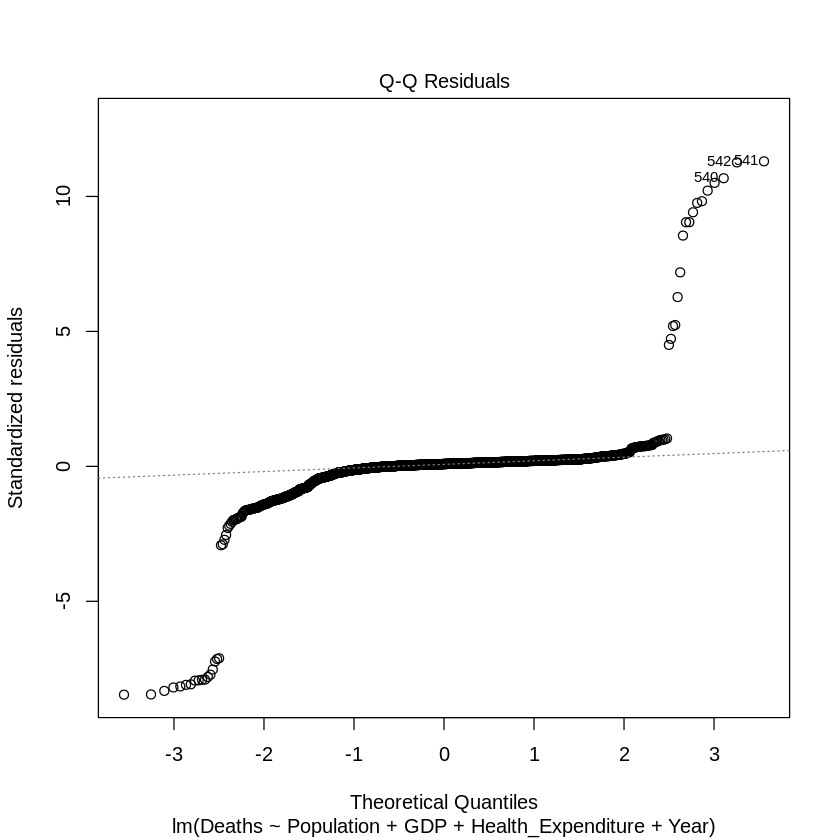

In [38]:
##Multi-Linear regresson using all 4 variables

Linear_4parameters <- lm(Deaths ~ Population + GDP + Health_Expenditure + Year, data = Cancer_Deaths)
summary(Linear_4parameters)

plot(Linear_4parameters,which=2)
abline(Linear_4parameters, col ="blue")

$R^2 = 0.8628$ for Variables Population and GDP as variables

$R^2 = 0.8842$ for Variables Population and GDP as variables

So we can conclude that using all variables we can understand 88.5% of the Linear Model


 $ CancerDeaths <- 0.0007324 * Population + 0.0000002121 * GDP - 0.000001557 * Healthexpenditure - 881.6 *Year + 1763000$

# Prediction

In [39]:
Test <- Annual_deaths[Annual_deaths$year == c(2019) & Annual_deaths$entity == c('Afghanistan'), c('entity','code',	'year','neoplasms')]
head(Test)

,entity,code,year,neoplasms
,<chr>,<chr>,<int>,<int>
30,Afghanistan,AFG,2019,21247


In [40]:
Test1 <- Health_Expenditure[Health_Expenditure$year == 2019 & Health_Expenditure$country == c("Afghanistan"), c('che_gdp')]
head(Test1)

che_gdp
<dbl>
14.83132


In [41]:
Data1 <- data.frame(Population = 37,769,498)
predict(Linear_1, Data1)

Data2 <- data.frame(GDP = 18904502222.2108)
predict(Linear_2, Data2)

Data3 <- data.frame(Year = 2019)
predict(Linear_3, Data3)

Data4 <- data.frame(Health_Expenditure = 14.83132)
predict(Linear_4, Data4)

Data5 <- data.frame(Population = 37,769,498,GDP= 18904502222.2108)
predict(Linear_2parameters, Data5)

Data6 <- data.frame(Population = 37,769,498 ,GDP = 18904502222.2108,Year = 2019,Health_Expenditure = 14.83132)
predict(Linear_4parameters, Data6)

1 
710.6967

1 
3448.808

1 
50148.17

1 
27642.06

1 
-8796.465

1 
-18242.57

In [42]:
pop = 37769498
gdp = 18904502222.2108
Hexp = 14.83132
year = 2019

Cancerdeaths <- 0.0007324 * pop + 0.0000002121 * gdp - 0.000001557 * Hexp - 881.6 *year + 1763000
cat("Cancer Deaths:", Cancerdeaths, "\n")
cat("Actual Deaths:", 21247, "\n")
cat("Accuracy:", (Cancerdeaths/21247)*100, "\n")
cat("Error:",(21247 - Cancerdeaths)/21247, "\n")


Cancer Deaths: 14721.63 
Actual Deaths: 21247 
Accuracy: 69.28802 
Error: 0.3071198 


# Report


**Cancer Trend over 2000-2018:**


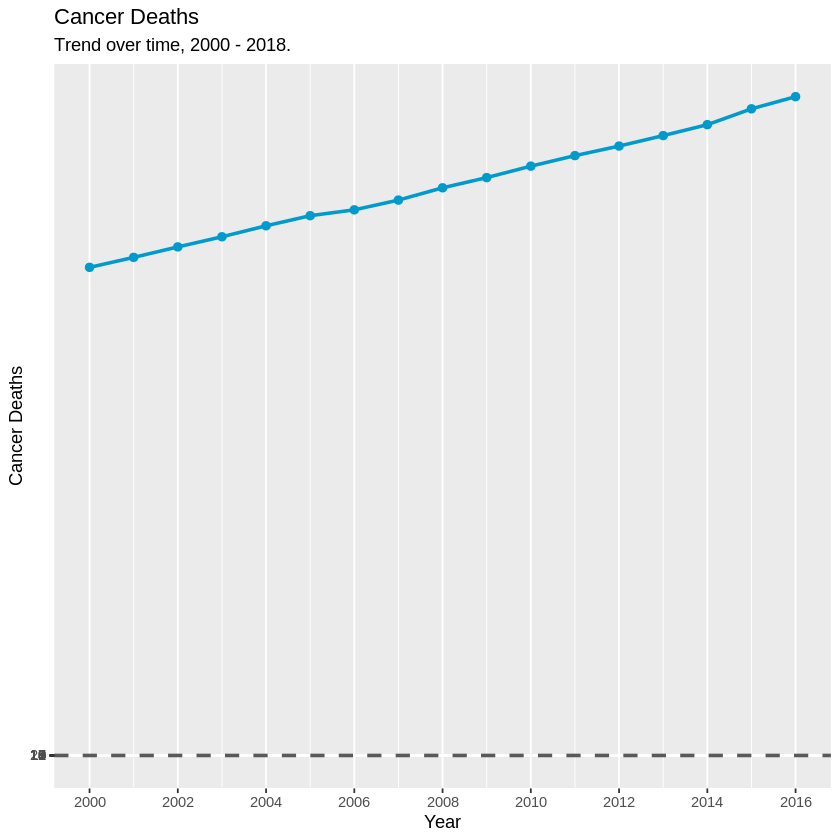

1. We are predicting the pattern of Deaths due to Cancer in each country in a  year. We are collecting data of Population, GDP, Health expenditire of each country year wise of 2000-2018.

2. We have 4 dependent variables Population, GDP, Health_Expenditure, Year.We are going find the correlation coefficients of each variable andfind correlation matrix.

3. We are going the countries with highest deaths, highest deaths per year, highest deaths based on population.

4. We are making linear regression model based on single and multiple linear regression.we are finding equation of model.we have predicted the data in 2019 and calculated error,accuracy of model.

5. Our model has an accuray of 69% for the new data.

**Cancer Deaths/Population:**

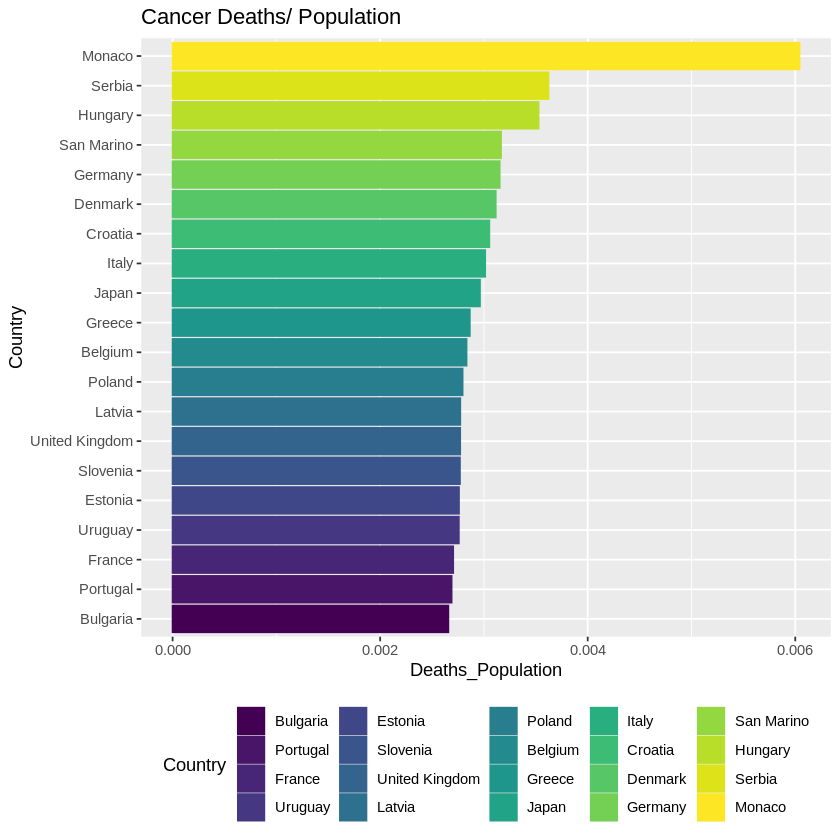

**Total Deaths based on Country**

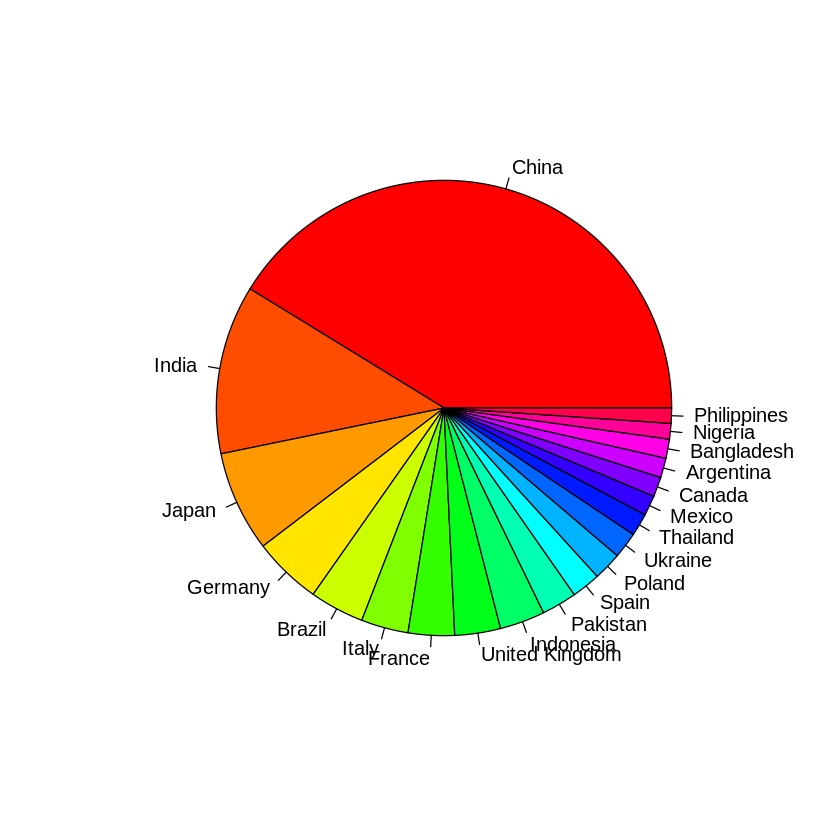


**Our Stake holders(Government) should concerate on countries like Monacco, Serbia, Hungary for better treatment and health care facilities. Insurance people should focus on countries like China,India, Japan for better health Insurance plans.**
